In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

In [30]:
X = np.load("X_mfcc_compare1.npy")
y = np.load("y_mfcc_compare1.npy")

In [33]:
X[0]

array([-1131.3708,     0.    ,     0.    ,     0.    ,     0.    ,
           0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
           0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
           0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
           0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
           0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
           0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
           0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
       -1131.3708,     0.    ,     0.    ,     0.    ,     0.    ,
           0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
           0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
           0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
           0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
           0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
           0.    ,     0.    ,     0.    ,     0.    ,     0. 

In [22]:
X_pos = []
X_neg = []
for idx, _y in np.ndenumerate(y):
    if _y == 0:
        X_neg.append(X[idx])
    elif _y == 1:
        X_pos.append(X[idx])

In [25]:
X_pos_flat = np.array(X_pos).flatten()
X_neg_flat = np.array(X_neg).flatten()

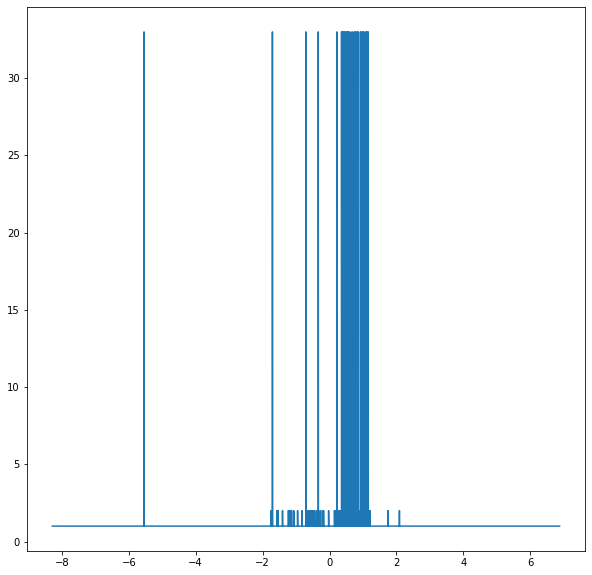

In [5]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot()

unique, counts = np.unique(X_neg, return_counts=True)
ax.plot(unique, counts)


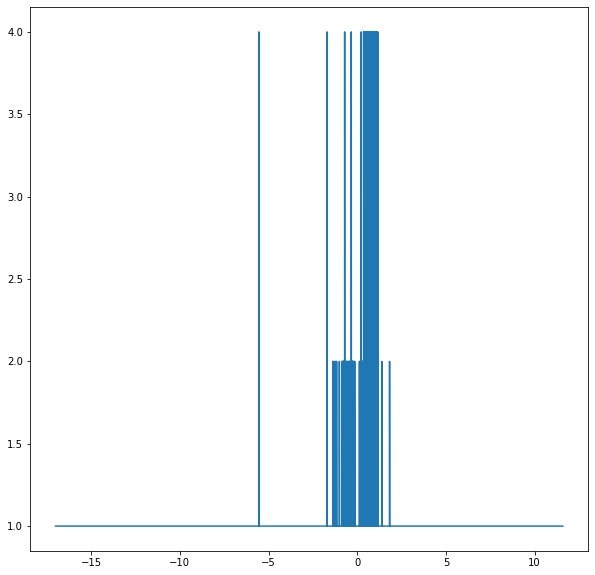

In [6]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot()

unique, counts = np.unique(X_pos, return_counts=True)
ax.plot(unique, counts)

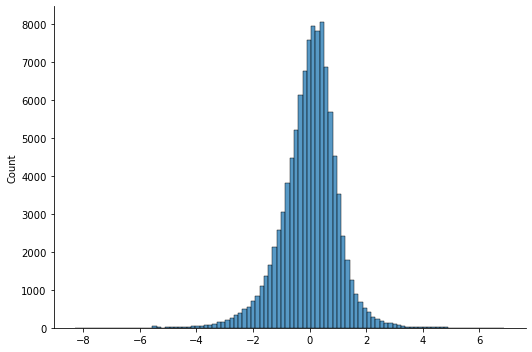

In [7]:
sns.displot(X_neg, bins = 100, aspect = 1.5)

(array([  1.,   0.,   5.,   2.,   3.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   5.,
          6.,  16.,  31., 115., 193.,  82.,   7.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,
          9.]),
 array([-621.50287  , -613.90265  , -606.3024   , -598.70215  ,
        -591.1019   , -583.5017   , -575.9015   , -568.3013   ,
        -560.701    , -553.10077  , -545.50055  , -537.9003   ,
        -530.30005  , -522.6998   , -515.0996   , -507.4994   ,
        -499.89914  , -492.29892  , -484.69867  , -477.09845  

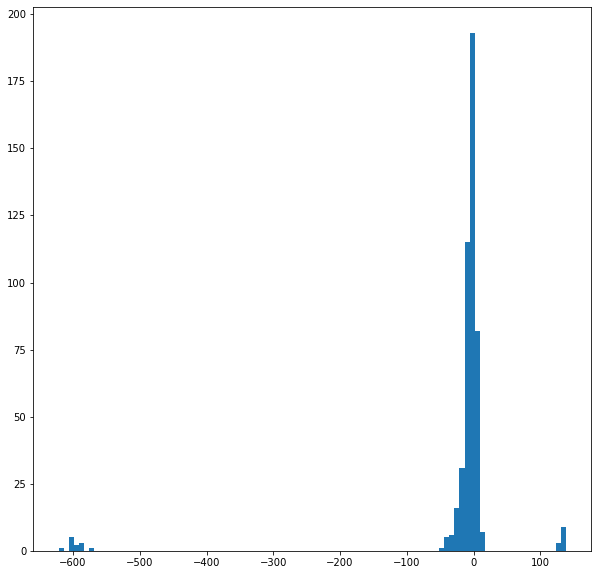

In [23]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.hist(X_neg[0], bins=100)

,sumsquare_error,aic,bic,kl_div
cauchy,0.000583,2352.908015,-2.720191e+07,0.079217
rayleigh,0.001528,inf,-2.598205e+07,2.063915
norm,0.001680,3046.227292,-2.586184e+07,2.986590
gamma,0.001788,2107.105036,-2.578280e+07,3.621662
powerlaw,0.001857,1650.786742,-2.573493e+07,4.147259


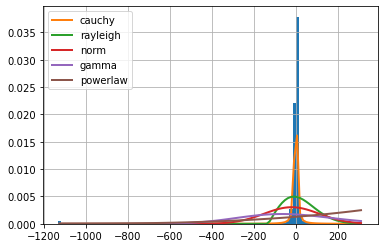

In [27]:
# sns.displot(X_neg[0], bins = 100, aspect = 1.5)
f = Fitter(X_neg_flat,
           distributions=["cauchy",
        "chi2",
        "expon",
        "exponpow",
        "gamma",
        "lognorm",
        "norm",
        "powerlaw",
        "rayleigh",
        "uniform",
    ],
          timeout=1000)
f.fit()
f.summary()

In [28]:
f.get_best(method = 'sumsquare_error')

{'cauchy': {'loc': -0.3022382437444856, 'scale': 2.5132747888932014}}

,sumsquare_error,aic,bic,kl_div
cauchy,0.000185,2269.697990,-7.024785e+06,0.051357
rayleigh,0.001679,inf,-6.296898e+06,1.637473
norm,0.001846,3546.439678,-6.265653e+06,2.375858
gamma,0.002006,1841.336332,-6.238322e+06,3.027670
powerlaw,0.002054,1701.298753,-6.230492e+06,3.351459


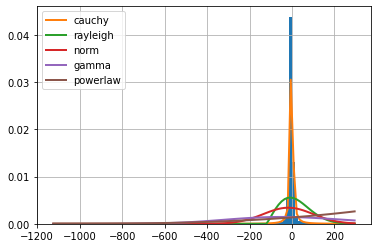

In [29]:
# sns.displot(X_pos, bins = 100, aspect = 1.5)
f = Fitter(X_pos_flat,
           distributions=["cauchy",
        "chi2",
        "expon",
        "exponpow",
        "gamma",
        "lognorm",
        "norm",
        "powerlaw",
        "rayleigh",
        "uniform",
    ],
          timeout=1000)
f.fit()
f.summary()

In [22]:
f.get_best(method = 'sumsquare_error')

{'rayleigh': {'loc': -1.0227674653420338, 'scale': 0.9508236687169301}}